# Trade-Offs of policies in objective space
Per problem formulation.

In [1]:
import os
import pandas as pd
from model.enumerations import ProblemFormulation
from ema_workbench import load_results
import matplotlib.pyplot as plt
from dmdu.general.visualization import plot_parallel_axis_plot_objectives
from dmdu.general.visualization import plot_single_parallel_axis_plot
from dmdu.general.visualization import get_limits_from_several_sources

In [2]:
target_directory = os.path.join(
    os.path.dirname(os.getcwd()),
    'data',
    'experiments_bad'
)

problem_formulations = [
    ProblemFormulation.UTILITARIAN_AGGREGATED,
    ProblemFormulation.UTILITARIAN_DISAGGREGATED,
    ProblemFormulation.SUFFICIENTARIAN_AGGREGATED,
    ProblemFormulation.SUFFICIENTARIAN_DISAGGREGATED,
    ProblemFormulation.EGALITARIAN_AGGREGATED,
    ProblemFormulation.EGALITARIAN_DISAGGREGATED,
    ProblemFormulation.PRIORITARIAN_AGGREGATED,
    ProblemFormulation.PRIORITARIAN_DISAGGREGATED,
]

outcome_names = [
    'Utility',
    'Disutility',
    'Atmospheric Temperature',
    'Industrial Emission',
    # 'Total Output',
    # 'Temperature overshoot',
    # 'Damages',
    # "Distance to consumption threshold",
    # "Population below consumption threshold",
    # "Distance to damage threshold",
    # "Population above damage threshold",
    # 'Number of regions below consumption threshold',
    # 'Number of regions above damage threshold',
    # 'Highest damage per capita',
    # "Intratemporal consumption Gini",
    # "Intratemporal damage Gini",
    # 'Lowest income per capita'
]
year = 2105
outcome_names = [f'{name} {year}'  for name in outcome_names]

## Load outcomes
From optimal policies with 50 random scenarios.

In [3]:
problem_formulations_dict = {}
for problem_formulation in problem_formulations:

    # Define path to load data from
    file = f'results_{problem_formulation.name}'
    path = os.path.join(target_directory, file)

    # Load results
    _, outcomes = load_results(path)
    outcomes = pd.DataFrame(outcomes)
    outcomes = outcomes.loc[:, outcome_names]

    problem_formulations_dict[problem_formulation.name] = outcomes

[]

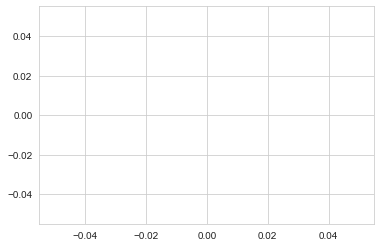

In [4]:
plt.plot()

## Shared Parallel Axis Plot

In [5]:
# plot_parallel_axis_plot_objectives(
#     problem_formulations_dict=problem_formulations_dict,
#     saving=False,
#     file_name=None
# )

## Separate Parallel Axis Plots

In [6]:
limits = get_limits_from_several_sources(problem_formulations_dict)

for problem_formulation, outcomes in problem_formulations_dict.items():
    print(problem_formulation)
    plot_single_parallel_axis_plot(
        df=outcomes,
        limits=limits,
        problem_formulation=problem_formulation,
        saving=True,
        file_name=f'trade-offs_all_{problem_formulation}'
    )

## Combine figures into one image

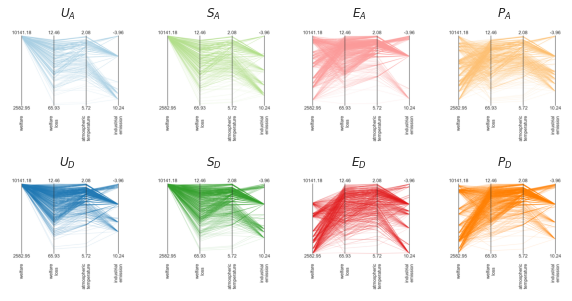

In [7]:
from matplotlib import pyplot as plt

image_folder = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    'outputimages',
    'tradeoffs'
)

images = []
for problem_formulation in problem_formulations:
    file_name = f'trade-offs_all_{problem_formulation.name}.png'
    img = plt.imread(os.path.join(image_folder, file_name))
    images.append(img)

fig, axes = plt.subplots(2, 4, figsize=(10,5))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
axes[0,0].imshow(images[0])
axes[1,0].imshow(images[1])
axes[0,1].imshow(images[2])
axes[1,1].imshow(images[3])
axes[0,2].imshow(images[4])
axes[1,2].imshow(images[5])
axes[0,3].imshow(images[6])
axes[1,3].imshow(images[7])

axes[0, 0].set_title(r'$U_A$')
axes[1, 0].set_title(r'$U_D$')
axes[0, 1].set_title(r'$S_A$')
axes[1, 1].set_title(r'$S_D$')
axes[0, 2].set_title(r'$E_A$')
axes[1, 2].set_title(r'$E_D$')
axes[0, 3].set_title(r'$P_A$')
axes[1, 3].set_title(r'$P_D$')

axes[0,0].axis('off')
axes[1,0].axis('off')
axes[0,1].axis('off')
axes[1,1].axis('off')
axes[0,2].axis('off')
axes[1,2].axis('off')
axes[0,3].axis('off')
axes[1,3].axis('off')

path = os.path.join(image_folder, 'trade_offs_all_50_bad.png')
fig.savefig(path, dpi=300, bbox_inches='tight')